In [ ]:
import numpy as np
import pandas as pd

# a random seed for reproducibility
np.random.seed(0)

# the number of samples
n_samples = 500

# synthetic data
rainfall = np.random.uniform(0, 20, n_samples)  # Rainfall in mm
river_level = np.random.uniform(0, 5, n_samples)  # River level in meters
building_density = np.random.uniform(0, 1, n_samples)  # Building density (0 to 1)
flood_extent = 0.3 * rainfall + 0.2 * river_level + np.random.normal(0, 2, n_samples)  # Flood extent in meters
damage_estimation = 50 * flood_extent * building_density + np.random.normal(0, 20, n_samples)  # Damage estimation

# an impact label based on damage
impact_labels = np.where(damage_estimation > 500, 'Severe', np.where(damage_estimation > 200, 'Moderate', 'Minor'))

# a DataFrame to store the synthetic data
data = pd.DataFrame({
    'Rainfall (mm)': rainfall,
    'River Level (m)': river_level,
    'Building Density': building_density,
    'Flood Extent (m)': flood_extent,
    'Damage Estimation ': damage_estimation,
    'Impact Label': impact_labels
})

data.to_csv('dummy_flood_dataset.csv', index=False)

print(data.head())


   Rainfall (mm)  River Level (m)  Building Density  Flood Extent (m)  \
0      10.976270         1.551904          0.592880          6.046032   
1      14.303787         1.865174          0.010064          4.278487   
2      12.055268         2.624852          0.475826          4.074912   
3      10.897664         3.752975          0.708770          0.958287   
4       8.473096         1.667537          0.043975          3.288817   

   Damage Estimation  Impact Label  
0          183.330380        Minor  
1           25.383546        Minor  
2          116.765680        Minor  
3           30.226095        Minor  
4          -26.458987        Minor  


   Rainfall (mm)  River Level (m)  Building Density  Flood Extent (m)  \
0      10.976270         1.551904          0.592880          6.046032   
1      14.303787         1.865174          0.010064          4.278487   
2      12.055268         2.624852          0.475826          4.074912   
3      10.897664         3.752975          0.708770          0.958287   
4       8.473096         1.667537          0.043975          3.288817   

   Damage Estimation  Impact Label  
0          183.330380        Minor  
1           25.383546        Minor  
2          116.765680        Minor  
3           30.226095        Minor  
4          -26.458987        Minor  
       Rainfall (mm)  River Level (m)  Building Density  Flood Extent (m)  \
count     500.000000       500.000000        500.000000        500.000000   
mean        9.931953         2.476227          0.511378          3.524322   
std         5.835128         1.450096          0.301933          2.463163   
min         0.093910         0.

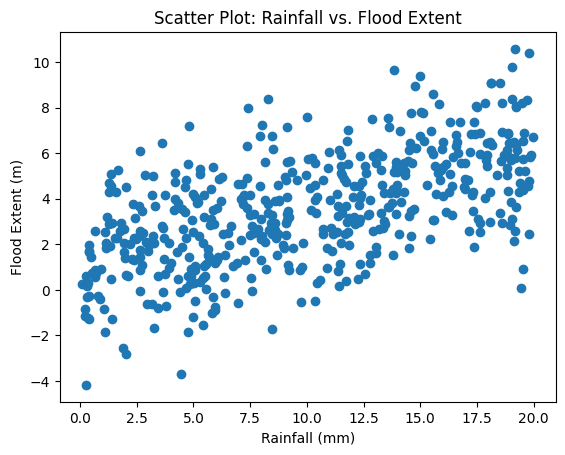

In [ ]:

data = pd.read_csv('dummy_flood_dataset.csv')

print(data.head())

# Basic statistics summary
summary = data.describe()
print(summary)

# Scatter plot
import matplotlib.pyplot as plt

plt.scatter(data['Rainfall (mm)'], data['Flood Extent (m)'])
plt.xlabel('Rainfall (mm)')
plt.ylabel('Flood Extent (m)')
plt.title('Scatter Plot: Rainfall vs. Flood Extent')
plt.show()

Mean Absolute Error (Damage Estimation): 49.64
Accuracy (Impact Assessment): 90.00%


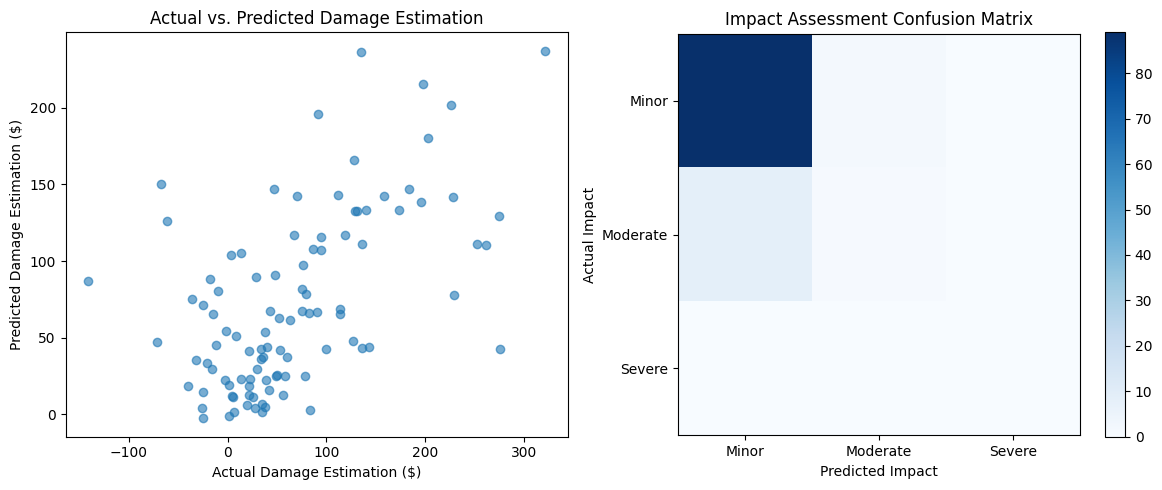

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt

np.random.seed(0)
n_samples = 500
rainfall = np.random.uniform(0, 20, n_samples)  # Simulated rainfall data (mm)
river_level = np.random.uniform(0, 5, n_samples)  # Simulated river level data (m)
flood_extent = 0.3 * rainfall + 0.2 * river_level + np.random.normal(0, 2, n_samples)  # Simulated flood extent (m)
building_density = np.random.uniform(0, 1, n_samples)  # Simulated building density
damage_estimation = 50 * flood_extent * building_density + np.random.normal(0, 20, n_samples)  # Simulated damage estimation
impact_labels = np.where(damage_estimation > 500, 'Severe', np.where(damage_estimation > 200, 'Moderate', 'Minor'))

data = pd.DataFrame({'Rainfall (mm)': rainfall, 'River Level (m)': river_level,
                     'Flood Extent (m)': flood_extent, 'Building Density': building_density,
                     'Damage Estimation ($)': damage_estimation, 'Impact Label': impact_labels})

# Split the data into training and testing sets
X = data[['Rainfall (mm)', 'River Level (m)', 'Building Density']]
y_damage = data['Damage Estimation ($)']
y_impact = data['Impact Label']
X_train, X_test, y_train_damage, y_test_damage, y_train_impact, y_test_impact = train_test_split(
    X, y_damage, y_impact, test_size=0.2, random_state=42
)

# a random forest regressor for damage estimation
damage_model = RandomForestRegressor(n_estimators=100, random_state=42)
damage_model.fit(X_train, y_train_damage)

# a random forest classifier for impact assessment
impact_model = RandomForestClassifier(n_estimators=100, random_state=42)
impact_model.fit(X_train, y_train_impact)

y_pred_damage = damage_model.predict(X_test)
y_pred_impact = impact_model.predict(X_test)

mae = mean_absolute_error(y_test_damage, y_pred_damage)
print(f"Mean Absolute Error (Damage Estimation): {mae:.2f}")

# impact model with accuracy
accuracy = accuracy_score(y_test_impact, y_pred_impact)
print(f"Accuracy (Impact Assessment): {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_damage, y_pred_damage, alpha=0.6)
plt.xlabel("Actual Damage Estimation ($)")
plt.ylabel("Predicted Damage Estimation ($)")
plt.title("Actual vs. Predicted Damage Estimation")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_impact, y_pred_impact, labels=['Minor', 'Moderate', 'Severe'])
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Impact Assessment Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(conf_matrix)), ['Minor', 'Moderate', 'Severe'])
plt.yticks(np.arange(len(conf_matrix)), ['Minor', 'Moderate', 'Severe'])
plt.xlabel('Predicted Impact')
plt.ylabel('Actual Impact')

plt.tight_layout()
plt.show()